In [31]:
#Import all important libraries
#Google drive for needed files https://drive.google.com/drive/folders/1A0g3eYgeQGGpw7fzVYZOhcBcTCnorQSy?usp=share_link
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Check where is the Cascade Classifier located in the CV2 library 
opencv_home = cv2.__file__
folders = opencv_home.split(os.path.sep)[0:-1]
path = folders[0]
for folder in folders[1:]:
    path = path + "/" + folder
face_detector_path = path+"/data/haarcascade_frontalface_default.xml"
haar_detector = cv2.CascadeClassifier(face_detector_path)

In [33]:
def detect_faces(img):
    #Transform the image to grey to detect faces correctlly 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #detectMultiScale takes three arguments :the input image, scaleFactor and minNeighbours
    faces = haar_detector.detectMultiScale(gray, 1.3, 5)
    return faces

In [34]:
#Create an instance from model detection
gender_model =cv2.dnn.readNetFromCaffe("gender.prototxt", "gender.caffemodel")

In [35]:
#Labels of the class
class_labels = ['Woman','Man']

In [36]:
len(class_labels)

2

In [37]:
#Reading the first image
img_1 = cv2.imread('ep2.jpg')

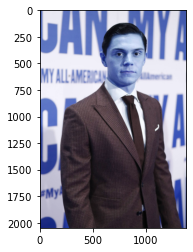

In [38]:
#Showing the image
plt.imshow(img_1)

In [39]:
#Using the method implemented above
faces = detect_faces(img_1)

In [40]:
#Creating a loop to go through the image to detect the face and determine the gender
for face in faces:
    x, y, w, h = face
    
    #Cropping the detected face
    detected_face = img_1[int(y):int(y+h), int(x):int(x+w)]   
    
    #The caffe model that we are using expects (1, 3, 224, 224) input shape
    detected_face = cv2.resize(detected_face, (224, 224))
    #returns a blob which is our input image after mean subtraction, normalizing, and channel swapping
    imgG = cv2.dnn.blobFromImage(detected_face)
    
    #Using the model
    gender_model.setInput(imgG)
    
    #These are the classes we have in this model : Woman, Man
    #Runing a forward pass to compute the net output
    gender_class = gender_model.forward()[0]
    gender = 'Woman ' if np.argmax(gender_class) == 0 else 'Man'

The gender is:  Man


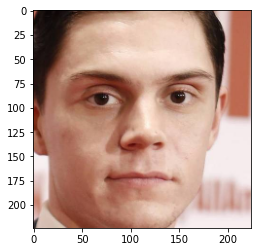

In [41]:
#Show the detected face only
plt.imshow(detected_face[:, :, ::-1]);
print("The gender is: ", gender)

In [42]:
#Reading the second image
img_2 = cv2.imread('blake.jpg')

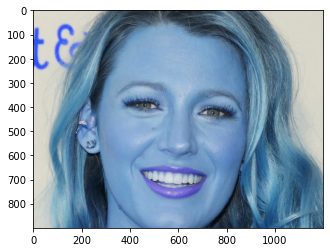

In [43]:
#Showing the image
plt.imshow(img_2)

In [44]:
#Using the method implemented above
faces = detect_faces(img_2)

In [45]:
#Creating a loop to go through the image to detect the face and determine the gender
for face in faces:
    x, y, w, h = face
    
    #Cropping the detected face
    detected_face = img_2[int(y):int(y+h), int(x):int(x+w)]   
    
    #The caffe model that we are using expects (1, 3, 224, 224) input shape
    detected_face = cv2.resize(detected_face, (224, 224))
    #returns a blob which is our input image after mean subtraction, normalizing, and channel swapping
    imgG = cv2.dnn.blobFromImage(detected_face)
    
    #Using the model
    gender_model.setInput(imgG)
    
    #These are the classes we have in this model : Woman, Man
    #Runing a forward pass to compute the net output
    gender_class = gender_model.forward()[0]
    gender = 'Woman ' if np.argmax(gender_class) == 0 else 'Man'

Gender:  Woman 


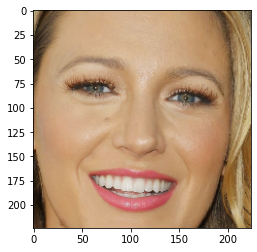

In [46]:
#Show the detected face only
plt.imshow(detected_face[:, :, ::-1]);
print("Gender: ", gender)